In [2]:
import sys
sys.path.append('../')

In [3]:
from scripts.utils import data_path
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
%matplotlib inline

# Catalogs loading and preprocessing

## Counterparts catalog

In [4]:
ctps = pd.read_pickle(data_path+'csc_desi_r50_gaia_ctps.gz_pkl', compression='gzip')
ctps['is_counterpart'] = True
x_ray_flux_lim = 3e-15

ctps = ctps[ctps['flux_csc_05_2']>x_ray_flux_lim]
ctps_secure = ctps[ctps['counterpart_quality_flag']==1]
ctps_secure.head(5)

,name_csc,ra_csc,dec_csc,sep_csc,release,brickid,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,flux_csc_05_2,r_98_csc,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,desi_id,r_false_003_dens_deg2_sep_10_50,sep_csc_less_r_98,sep_csc_less_r_false,total_sep_csc_less_r_98,counterpart_quality_flag,is_counterpart
122,2CXO J000001.7+003824,0.007351,0.640170,0.510857,9010,334688,289,True,b'PSF',0.007209,0.640172,7.968032e+10,7.686111e+10,0.446684,0.791833,0.833604,2.084917,-1.714462,-19.942390,-1472.021851,0.0,0.0,0.0,0.0,0.0,0.0,4.925396e-15,1.598058,23.374999,22.753416,22.697600,21.702278,NaN,NaN,NaN,9010_334688_289,0.783775,True,True,1,1,True
706,2CXO J000002.4+004444,0.010261,0.745756,0.168650,9010,334688,428,True,b'DEV',0.010231,0.745719,4.837769e+09,2.799387e+09,0.409332,0.494572,1.014339,4.271025,2.108738,-69.947258,-2105.617432,0.0,0.0,0.0,0.0,0.0,0.0,6.223680e-15,1.187993,23.469812,23.264425,22.484542,20.923670,21.689943,NaN,NaN,9010_334688_428,0.747015,True,True,1,1,True
1151,2CXO J000004.2+004038,0.017509,0.677271,0.340550,9010,334688,728,True,b'DEV',0.017430,0.677220,1.214703e+10,1.709058e+10,0.834075,1.629502,2.029589,12.394610,8.341883,151.319443,-9200.514648,0.0,0.0,0.0,0.0,0.0,0.0,3.489255e-15,1.210327,22.696987,21.969863,21.731480,19.766918,20.196840,17.050263,NaN,9010_334688_728,0.758688,True,True,1,1,True
1528,2CXO J000004.5-552604,0.018973,-55.434463,0.302039,9010,58166,392,True,b'PSF',0.018886,-55.434395,5.386807e+11,8.053757e+11,2.826036,3.806152,4.085902,24.098080,35.776527,-103.290527,7386.880371,0.0,0.0,0.0,0.0,0.0,0.0,1.030507e-14,2.599839,21.372056,21.048785,20.971780,19.045044,18.616005,NaN,12.828847,9010_58166_392,0.850754,True,True,1,1,True
1634,2CXO J000004.7+004654,0.019850,0.781780,0.341217,9010,334688,828,True,b'SER',0.019784,0.781712,4.079795e+13,4.402594e+13,257.798218,611.787598,1161.549072,1052.845337,677.435303,1074.324219,1625.962158,0.0,0.0,0.0,0.0,0.0,0.0,3.925906e-15,1.477375,16.471800,15.533499,14.837406,14.944088,15.422831,14.922162,14.472224,9010_334688_828,0.767811,True,True,1,1,True


## Field sources catalog

In [5]:
field_srcs = pd.read_pickle(data_path+'csc_desi_r50_gaia_field.gz_pkl', compression='gzip')
field_srcs['is_counterpart'] = False
field_srcs['flux_csc_05_2'] = np.nan
field_srcs.head(5)

,name_csc,ra_csc,dec_csc,sep_csc,release,brickid,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,flux_csc_05_2,r_98_csc,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,desi_id,r_false_003_dens_deg2_sep_10_50,sep_csc_less_r_98,sep_csc_less_r_false,total_sep_csc_less_r_98,counterpart_quality_flag,is_counterpart
1190825,2CXO J033430.4-011651,53.627066,-1.280915,23.568349,9010,323382,2614,True,b'PSF',53.629690,-1.286913,3.105103e+09,3.588041e+09,0.076001,0.175766,0.411385,3.342325,4.202922,71.871582,570.726074,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.751964,25.297957,24.387663,23.464378,21.189878,20.941122,17.858607,15.608931,9010_323382_2614,1.247142,False,False,1,0,False
2852416,2CXO J114712.7+473404,176.803207,47.567859,45.235197,9011,574817,1089,True,b'REX',176.796392,47.579553,4.275364e+09,4.264689e+09,0.263743,0.501181,1.114844,2.686386,-0.221183,-31.073353,-59.048748,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.446617,23.947047,23.250013,22.381965,21.427079,NaN,NaN,NaN,9011_574817_1089,1.466309,False,False,1,0,False
128724,2CXO J003053.7+262704,7.724060,26.451121,39.589783,9010,477901,3285,True,b'PSF',7.712595,26.447175,3.490283e+10,3.025202e+10,0.083862,0.316487,4.178187,3.164432,3.984739,31.538553,395.943604,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.753609,25.191090,23.749109,20.947530,21.249261,20.999000,18.752896,16.005917,9010_477901_3285,1.113112,False,False,1,0,False
830307,2CXO J022645.4+002937,36.689538,0.493884,43.370675,9011,333394,2785,True,b'PSF',36.685776,0.505329,1.550137e+09,1.767493e+09,0.182481,0.344916,0.357774,-0.769745,-0.526464,-3.532678,-869.321594,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.617135,24.346956,23.655718,23.615978,NaN,NaN,NaN,NaN,9011_333394_2785,0.727822,False,False,2,0,False
3388112,2CXO J125906.6-015058,194.777631,-1.849522,30.049153,9010,321067,860,True,b'REX',194.784322,-1.854517,1.047790e+09,1.050963e+09,0.020971,0.052430,0.711424,3.427131,4.390832,12.988870,-428.256348,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.213625,26.695955,25.701044,22.869679,21.162673,20.893633,19.716071,NaN,9010_321067_860,1.142539,False,False,1,0,False


## Joined catalog + color features

In [6]:
photo_cat = pd.concat([ctps_secure, field_srcs])

features_cols = ['mag_g','mag_r','mag_z'] 
features_cols += ['mag_w1', 'mag_w2', 'mag_w3', 'mag_w4']

features_cols += ['col_gr', 'col_rz']
features_cols += ['col_zw1', 'col_rw2']

target_col = ['is_counterpart']


photo_cat['col_gr'] = photo_cat['mag_g'] - photo_cat['mag_r']
photo_cat['col_rz'] = photo_cat['mag_r'] - photo_cat['mag_z']
photo_cat['col_zw1'] = photo_cat['mag_z'] - photo_cat['mag_w1']
photo_cat['col_rw2'] = photo_cat['mag_r'] - photo_cat['mag_w2']

photo_cat = photo_cat[features_cols+target_col+['flux_csc_05_2']]

photo_cat = photo_cat.replace([np.inf, -np.inf], np.nan)
photo_cat= photo_cat.dropna(subset = features_cols, how = 'any')


print(photo_cat.is_counterpart.value_counts())
photo_cat = photo_cat.sample(frac=1)
photo_cat.reset_index(inplace=True, drop = True)


photo_cat.head(20)


False    46082
True     19767
Name: is_counterpart, dtype: int64


,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,col_gr,col_rz,col_zw1,col_rw2,is_counterpart,flux_csc_05_2
0,20.921376,20.031659,19.390573,19.051197,19.669843,17.227068,15.969971,0.889716,0.641086,0.339375,0.361816,False,NaN
1,23.325114,23.013230,22.284441,21.334221,23.341006,20.302069,15.157070,0.311884,0.728789,0.950220,-0.327776,False,NaN
2,21.262934,21.362145,21.787556,22.823758,21.057282,18.943577,17.917265,-0.099211,-0.425411,-1.036203,0.304862,False,NaN
3,24.409844,22.656621,22.234058,21.322279,21.908414,18.332417,15.208995,1.753223,0.422563,0.911780,0.748207,False,NaN
4,24.261602,23.736127,23.987994,21.883312,22.126781,17.381032,18.866448,0.525475,-0.251868,2.104682,1.609345,False,NaN
5,23.918120,23.237049,22.686845,22.893956,21.687935,17.927999,13.291987,0.681070,0.550205,-0.207111,1.549115,False,NaN
6,11.692562,10.979961,10.790625,10.367053,10.649439,9.212942,9.119164,0.712601,0.189337,0.423572,0.330522,True,1.278816e-13
7,22.395174,21.559722,20.566968,18.877399,18.934725,16.362711,13.725694,0.835452,0.992754,1.689569,2.624997,False,NaN
8,22.844620,22.035238,21.584384,21.592277,21.086721,16.996827,14.198129,0.809382,0.450854,-0.007893,0.948517,False,NaN
9,23.940098,23.063211,22.736543,20.495902,20.541167,19.933870,16.503834,0.876887,0.326668,2.240642,2.522044,True,4.802684e-15


# Design a scaler for the photometric features


In [7]:
from scripts.cross_match_scripts import my_scaler_forward

print(photo_cat.describe().loc[['min', 'max', 'mean']])

photo_cat_scaled = my_scaler_forward(photo_cat)
photo_cat_scaled.describe().loc[['min', 'max', 'mean']]

          mag_g      mag_r      mag_z     mag_w1     mag_w2     mag_w3  \
min    4.006522   3.049027   2.599347   5.525982   5.304505   6.090590   
max   34.799595  33.474365  30.043158  30.008155  32.974764  28.844500   
mean  22.599869  21.767394  20.982085  20.041123  20.142327  18.360288   

         mag_w4     col_gr     col_rz    col_zw1    col_rw2  flux_csc_05_2  
min    4.611003  -6.523710  -8.390169  -8.082085  -9.257968   3.001003e-15  
max   27.579348  10.628385  10.204371  12.334526  17.148034   9.704105e-12  
mean  15.753640   0.832476   0.785309   0.940962   1.625067   2.831525e-14  


,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,col_gr,col_rz,col_zw1,col_rw2,flux_csc_05_2
min,0.114472,0.087115,0.074267,0.157885,0.151557,0.174017,0.131743,-0.652371,-0.839017,-0.808208,-0.925797,3.001003e-15
max,0.994274,0.956410,0.858376,0.857376,0.942136,0.824129,0.787981,1.062839,1.020437,1.233453,1.714803,9.704105e-12
mean,0.645711,0.621926,0.599488,0.572604,0.575495,0.524580,0.450104,0.083248,0.078531,0.094096,0.162507,2.831525e-14


# Classifier test/train function

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from copy import copy
from pickle import dump #saving data https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/



def assess_classifier(clf, X_test, y_test):   
    try:
        X_test = X_test.to_numpy()
        y_test = y_test.to_numpy()
    except:
        pass
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true')


    plt.figure(figsize=(10,5))
    predict_proba = clf.predict_proba(X_test)[:,1]
    ax = sns.histplot(x = predict_proba, hue = y_test, bins = 50)
    ax.set(title = 'test sample', ylabel  = 'probability density', xlabel = 'classifier predicted probability')
    plt.legend(title='Counterpart', labels=['X-ray counterpart', 'Field source'])



    proba_axis = np.linspace(0,0.99,20)
    completeness = np.ones_like(proba_axis) #fraction of sources classifued as counterparts out of all counterparts
    purity = np.ones_like(proba_axis) #fraction of sources with a correct identification as a X-ray counterpart

    for i,prob_val in tqdm(enumerate(proba_axis)):
        y_pred_tmp = clf.predict_proba(X_test)[:,1] > prob_val
        cm_tmp = confusion_matrix(y_test, y_pred_tmp)
        completeness[i] = cm_tmp[1,1]/(cm_tmp[1,1]+cm_tmp[1,0])
        if (cm_tmp[0,1]+cm_tmp[1,1]) == 0:
            purity[i] = 1
        else:
            purity[i] = cm_tmp[1,1]/(cm_tmp[0,1]+cm_tmp[1,1])

    #purity and completeness interseption 
    id_inters = np.argmin(np.abs(completeness-purity))
    proba_inters = proba_axis[id_inters]
    best_completeness = completeness[id_inters].round(2)
    best_purity = purity[id_inters].round(2)

    plt.figure(figsize=(10,5))
    plt.plot(proba_axis, completeness, 'r-', label = 'completeness = [true positives]/[true positives + false positives]')
    plt.plot(proba_axis, purity, 'b--', label = 'purity = [true positives]/[true positives + false negatives]')
    plt.plot(proba_inters, best_completeness, '*r', label = 'best completeness = '+str(best_completeness))
    #plt.plot(proba_inters, best_purity, '*b', label = 'best purity = '+str(best_purity))
    plt.axvline(x=proba_inters, color='k', linestyle='--')
    plt.xlabel('classifier predicted probability')
    plt.ylabel('completeness/purity')
    #plt.suptitle('test sample, '+str(clf))
    plt.legend()
    return cm, best_completeness, predict_proba
        

def train_ANN_classifier(data_scaled, features_cols, target_col, x_ray_flux_bin=[3e-15,1e-9], train_test_fit_split = 0.3, downsample_field_srcs = True ):
    data = data_scaled.copy()
    data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]
    data = data[data.flux_csc_05_2.between(x_ray_flux_bin[0], x_ray_flux_bin[1])]
    data.drop(['flux_csc_05_2'], axis=1, inplace=True)

    #drop field sources to increase the significance of the is_counetrpart == 1 class
    #drop is_counterpart == 0 so that the field sources two-three times more numerous than the x-ray counterparts
    n_ctsp = data[data.is_counterpart==1].shape[0]
    n_field = data[data.is_counterpart==0].shape[0]
    print('n_ctsp:', n_ctsp)
    print('n_field:', n_field)

    if downsample_field_srcs:
        tmp_rat = 2*n_ctsp/n_field
        tmp_rat = np.min([tmp_rat, 1])
        data.drop(data[data['is_counterpart'] == 0].sample(frac=1-tmp_rat).index, inplace=True)

        n_ctsp = data[data.is_counterpart==1].shape[0]
        n_field = data[data.is_counterpart==0].shape[0]
        print('n_ctsp:', n_ctsp)
        print('n_field:', n_field)


    
    X_train, X_test, y_train, y_test = train_test_split(data[features_cols], data[target_col[0]], test_size=train_test_fit_split, stratify = data[target_col[0]])

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()

    nn = MLPClassifier(activation='relu', max_iter = 1000, random_state=111, early_stopping = True )
    grid_params = {'learning_rate_init': [10,  1e-1, 1e-3, 1e-5,], 'hidden_layer_sizes':[(10,10), (8,8), (8,8,8)] }
    grid_nn = GridSearchCV(nn, grid_params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_nn.fit(X_train, y_train)
    nn = grid_nn.best_estimator_
    print('best params:', grid_nn.best_params_)


    cm, best_completeness, best_purity = assess_classifier(nn, X_test, y_test)

        
    return nn, cm, best_completeness, best_purity

In [9]:
data_validation, data_train_test = train_test_split(photo_cat_scaled, test_size=0.4, stratify = photo_cat_scaled[target_col])

n_ctsp: 7907
n_field: 18433
n_ctsp: 7907
n_field: 15814


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_89812/3921104162.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.flux_csc_05_2[data.flux_csc_05_2.isna()] = x_ray_flux_bin[0]


best params: {'hidden_layer_sizes': (10, 10), 'learning_rate_init': 0.001}
[[4400  345]
 [ 488 1884]]


20it [00:00, 352.81it/s]


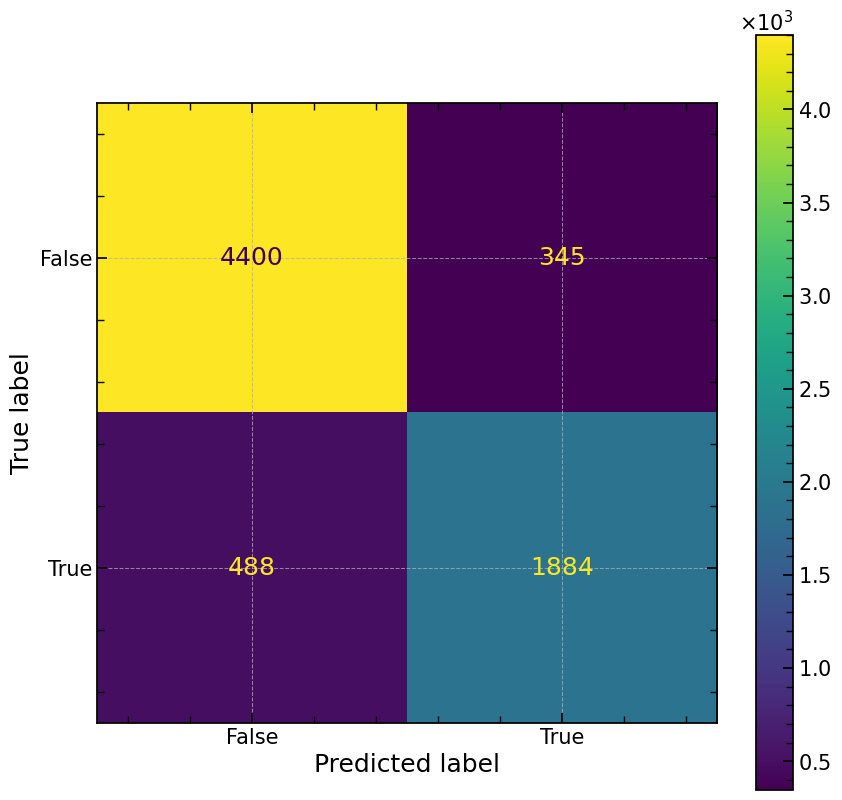

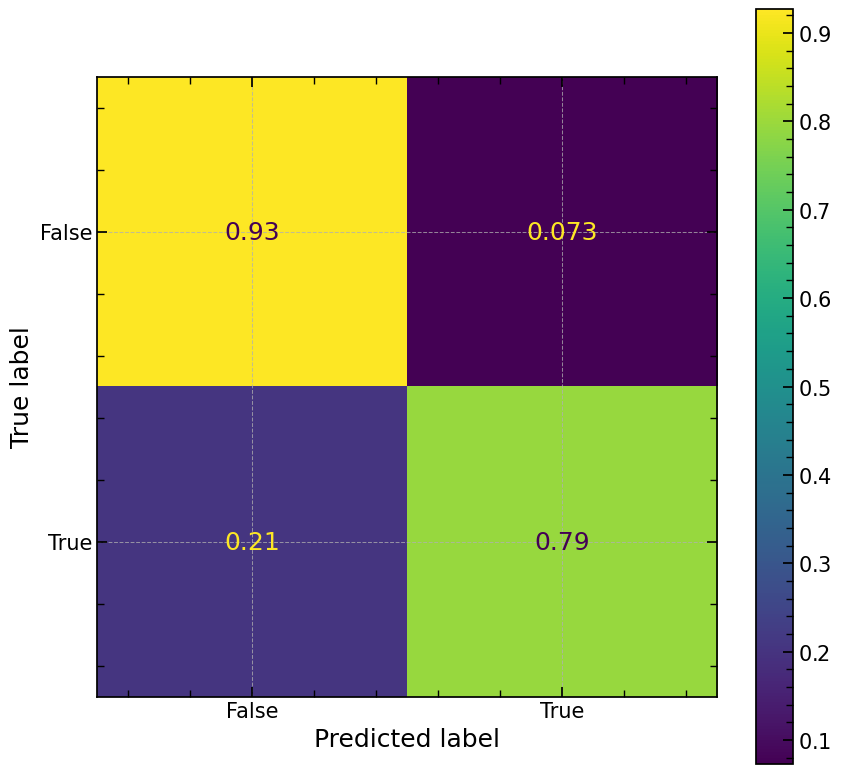

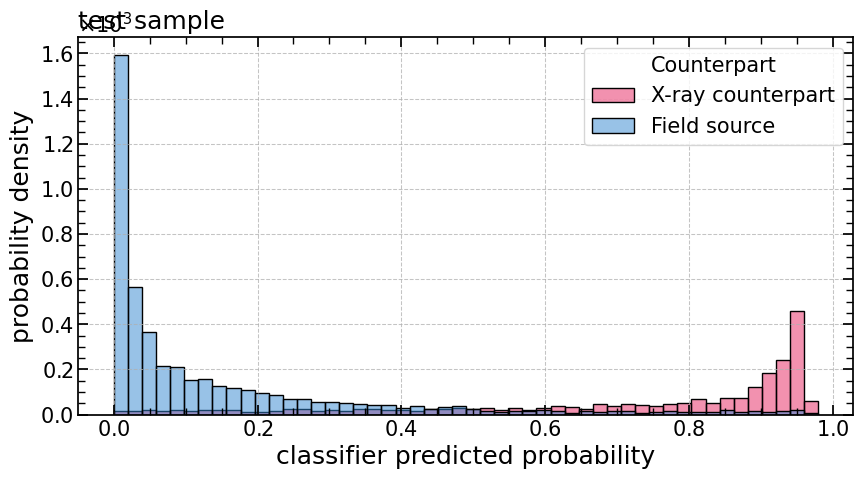

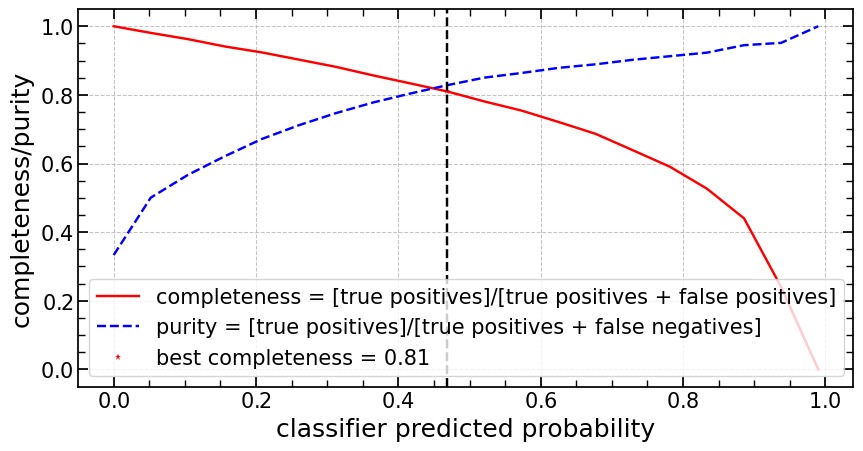

In [10]:
nn, cm, best_completeness, best_purity = train_ANN_classifier(data_train_test, features_cols, target_col, x_ray_flux_bin=[3e-15,6e-10],  train_test_fit_split = 0.3, )

[[25582  2067]
 [ 2430  9430]]


20it [00:00, 115.00it/s]


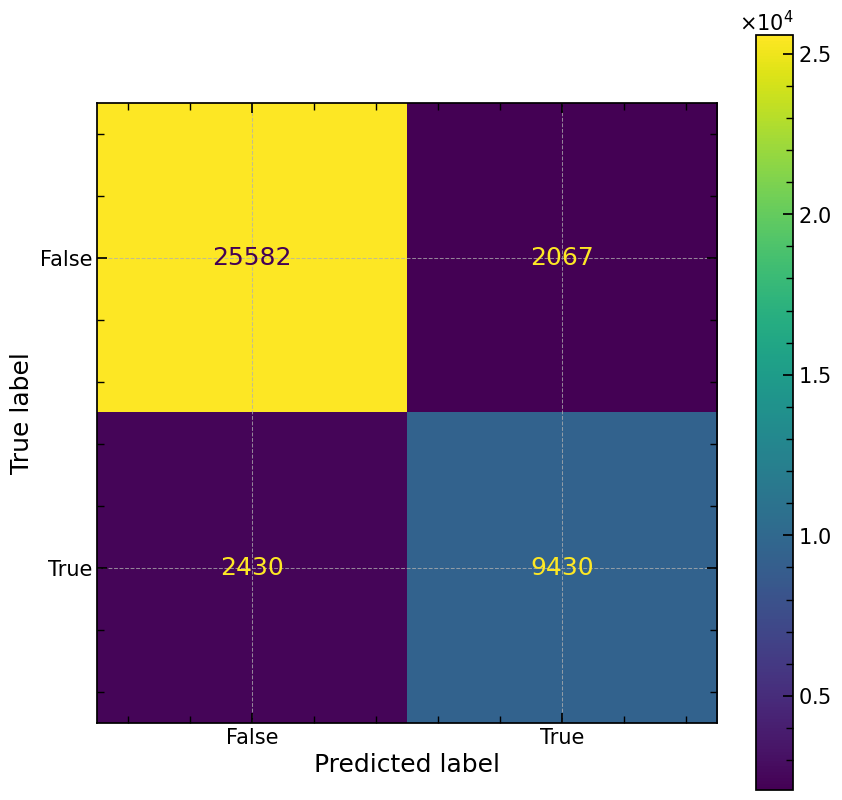

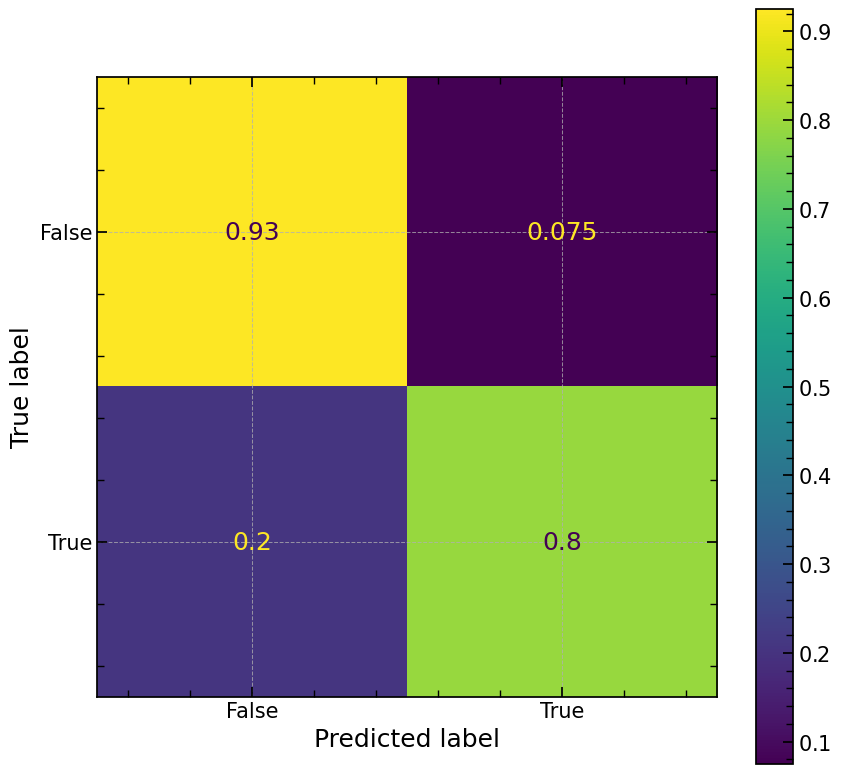

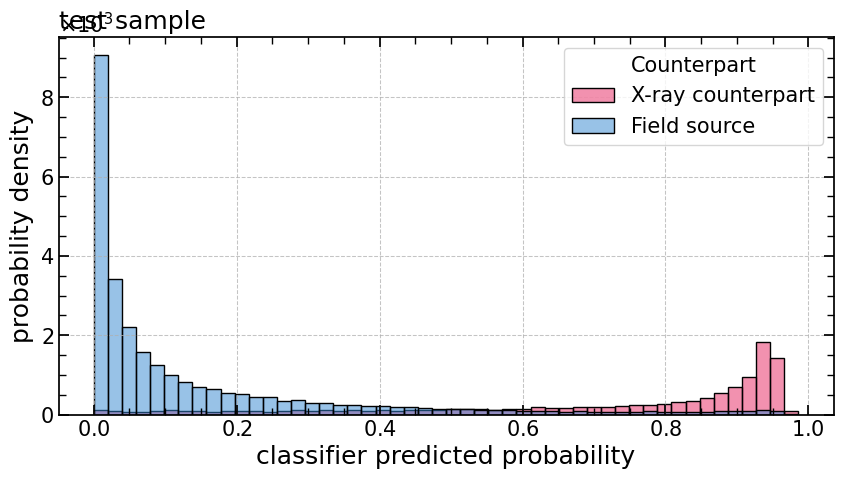

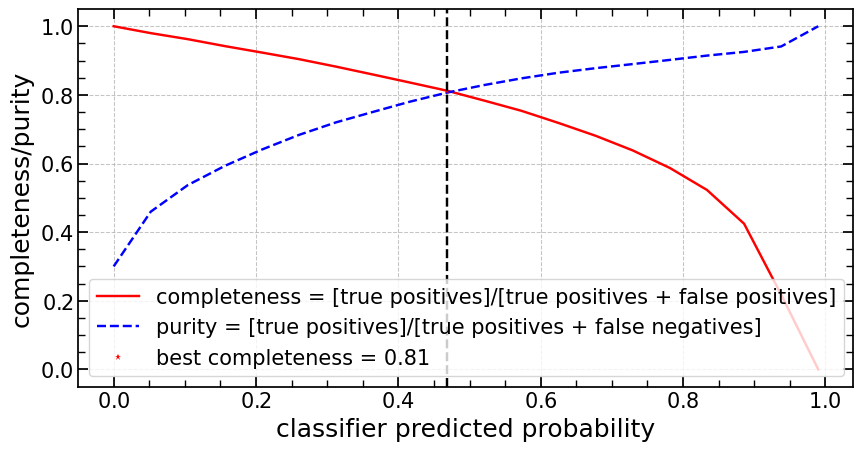

In [11]:
data_val_features = data_validation[features_cols]
data_val_target = data_validation[target_col[0]]
_, _, predict_proba = assess_classifier(nn, data_val_features, data_val_target)

# Saving classifier  and the  resulting histograms (for NWAY)

In [12]:
print(nn)
from joblib import dump, load
dump(nn, 'model/nn.joblib')

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=1000,
              random_state=111)


['model/nn.joblib']

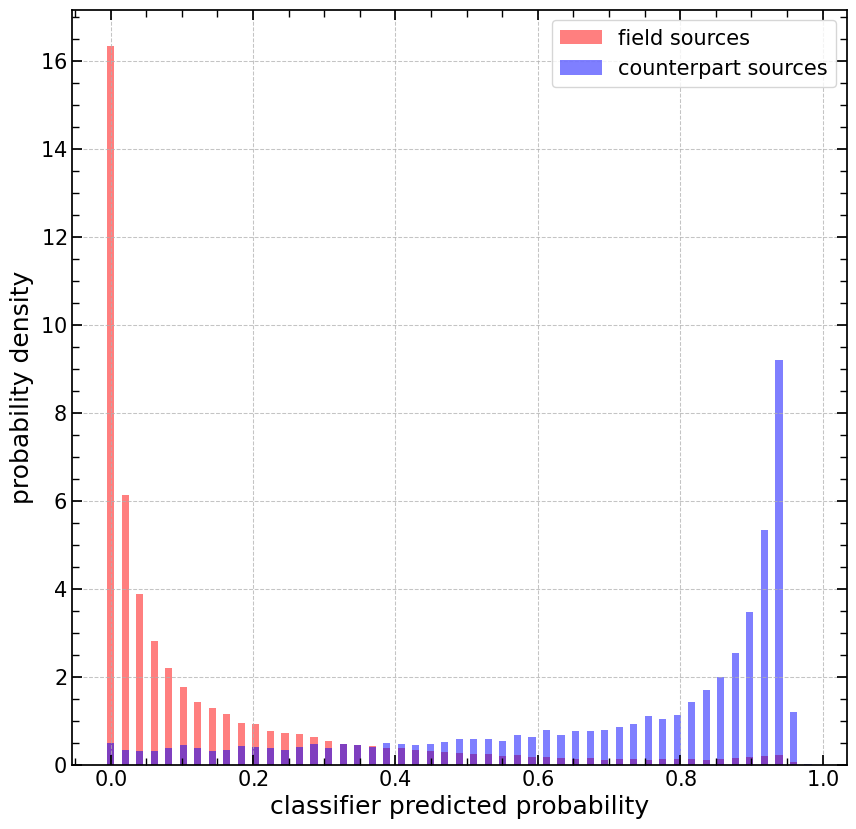

In [13]:
bins = np.linspace(0, 1, 50)
hist_field, bin_field = np.histogram(predict_proba[data_val_target==0], bins=bins, density=True)  
hist_ctsp, bin_ctsp = np.histogram(predict_proba[data_val_target==1], bins=bins, density=True)

plt.figure(figsize=(10,10))
plt.bar(bin_field[:-1], hist_field, width=0.01, color='r', label='field sources', alpha = 0.5)
plt.bar(bin_ctsp[:-1], hist_ctsp, width=0.01, color='b', label='counterpart sources', alpha = 0.5)
plt.legend()
plt.xlabel('classifier predicted probability')
plt.ylabel('probability density')

#save histograms in one file:
#with columns lo, hi, selected, others
hist_df = pd.DataFrame({'lo':bin_field[:-1], 'hi':bin_field[1:], 'selected':hist_field, 'others':hist_ctsp})

hist_df.to_csv('model/nn-prior.csv', index=False, sep = '\t', header = ['#lo', 'hi', 'selected', 'others'])